In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import DBSCAN
from kmodes.kprototypes import KPrototypes

In [2]:
data = pd.read_csv('Marketing_Campaign_Dataset.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

### Operation
- Dropping the columns 'AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Response' as they are not important for the model

In [6]:
data.drop(['AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Response'],axis = 1,inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

### Observations: 
- Combining the columns like KidHome and TeenHome and creating a new column called Children
- Then Dropping the original columns: KidHome and TeenHome

In [9]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome','Teenhome'],axis = 1,inplace = True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Dt_Customer          100279 non-null  object 
 6   Recency              100279 non-null  int64  
 7   MntWines             100279 non-null  int64  
 8   MntFruits            100279 non-null  int64  
 9   MntMeatProducts      100279 non-null  int64  
 10  MntFishProducts      100279 non-null  int64  
 11  MntSweetProducts     100279 non-null  int64  
 12  MntGoldProds         100279 non-null  int64  
 13  NumDealsPurchases    100279 non-null  int64  
 14  NumWebPurchases      100279 non-null  int64  
 15  NumCatalogPurchas

### Obseravtions
- OneHot Encoding of the categorical column Education
- Creates multiple cols with respect to the Education columns

In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse_output=False)
marital_encoded = ohe.fit_transform(data[["Marital_Status"]])
data[ohe.get_feature_names_out()] = marital_encoded


In [13]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1,1978,Master,Single,491796.22,2013-12-26,31,1364,72,1129,...,3,11,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1974,Master,Married,513926.78,2014-05-04,23,1275,94,455,...,3,11,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1972,Graduation,Alone,521309.22,2013-02-15,93,62,127,530,...,3,11,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1911,PhD,YOLO,231628.91,2013-06-12,13,251,87,1153,...,3,11,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1931,2n Cycle,Divorced,223936.10,2013-05-30,65,670,10,650,...,3,11,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Observations:
- Getting a new column called Age from the existing column of year of birth
- Then dropping the original columns of the Marital_Status and The year of birth since they are of no use now
- The proceeding with the creation of new column called Loyalty from the column from DT_customer
- The column is used to let us know about the alliance between the customer and company's time in years

In [15]:
data['Age'] = 2025 - data['Year_Birth']

In [16]:
data.drop(['Marital_Status','Year_Birth'],axis = 1,inplace = True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100279 non-null  int64  
 1   Education                100279 non-null  object 
 2   Income                   100279 non-null  float64
 3   Dt_Customer              100279 non-null  object 
 4   Recency                  100279 non-null  int64  
 5   MntWines                 100279 non-null  int64  
 6   MntFruits                100279 non-null  int64  
 7   MntMeatProducts          100279 non-null  int64  
 8   MntFishProducts          100279 non-null  int64  
 9   MntSweetProducts         100279 non-null  int64  
 10  MntGoldProds             100279 non-null  int64  
 11  NumDealsPurchases        100279 non-null  int64  
 12  NumWebPurchases          100279 non-null  int64  
 13  NumCatalogPurchases      100279 non-null  int64  
 14  NumS

### Observations:
- Now encoding the Education using the labelencoder. This is useful to create a set of integers assigned to each unique value
- In the col we have values like school , college and so on...
- Next few cells apply the above observations

In [19]:
label = LabelEncoder()
data['Education'] = label.fit_transform(data['Education'])

In [20]:
data['Education']

0         3
1         3
2         2
3         4
4         0
         ..
100274    4
100275    2
100276    2
100277    1
100278    1
Name: Education, Length: 100279, dtype: int32

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100279 non-null  int64  
 1   Education                100279 non-null  int32  
 2   Income                   100279 non-null  float64
 3   Dt_Customer              100279 non-null  object 
 4   Recency                  100279 non-null  int64  
 5   MntWines                 100279 non-null  int64  
 6   MntFruits                100279 non-null  int64  
 7   MntMeatProducts          100279 non-null  int64  
 8   MntFishProducts          100279 non-null  int64  
 9   MntSweetProducts         100279 non-null  int64  
 10  MntGoldProds             100279 non-null  int64  
 11  NumDealsPurchases        100279 non-null  int64  
 12  NumWebPurchases          100279 non-null  int64  
 13  NumCatalogPurchases      100279 non-null  int64  
 14  NumS

In [22]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Loyalty"] = 2025 - data["Dt_Customer"].dt.year

In [23]:
data.drop('Dt_Customer',axis = 1,inplace = True)

In [24]:
data.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty
0,1,3,491796.22,31,1364,72,1129,45,69,206,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,12
1,2,3,513926.78,23,1275,94,455,217,104,61,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51,11
2,3,2,521309.22,93,62,127,530,252,237,170,...,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53,12
3,4,4,231628.91,13,251,87,1153,157,241,197,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,12
4,5,0,223936.10,65,670,10,650,34,96,321,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94,12


In [25]:
data.describe()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty
count,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,...,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000
mean,50140.000000,1.998165,333467.834329,49.002802,746.463477,99.083387,862.007549,129.312987,131.026656,181.281515,...,2.001586,0.124194,0.124951,0.125350,0.124802,0.122907,0.126567,0.125839,80.860280,11.967351
std,28948.198159,1.413140,191857.770691,28.531490,431.644442,57.403252,498.945468,74.862017,75.990216,104.854665,...,1.157843,0.329804,0.330665,0.331117,0.330496,0.328332,0.332489,0.331669,29.713721,0.693005
min,1.000000,0.000000,1735.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,11.000000
25%,25070.500000,1.000000,167676.135000,24.000000,372.000000,50.000000,431.000000,65.000000,65.000000,90.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,11.000000
50%,50140.000000,2.000000,332609.990000,49.000000,746.000000,99.000000,862.000000,130.000000,131.000000,182.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,12.000000
75%,75209.500000,3.000000,498824.360000,74.000000,1119.000000,149.000000,1297.000000,194.000000,197.000000,273.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,12.000000
max,100279.000000,4.000000,666664.130000,98.000000,1492.000000,198.000000,1724.000000,258.000000,262.000000,361.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,132.000000,13.000000


In [26]:
data.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty
0,1,3,491796.22,31,1364,72,1129,45,69,206,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,12
1,2,3,513926.78,23,1275,94,455,217,104,61,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51,11
2,3,2,521309.22,93,62,127,530,252,237,170,...,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53,12
3,4,4,231628.91,13,251,87,1153,157,241,197,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,12
4,5,0,223936.10,65,670,10,650,34,96,321,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94,12


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100279 non-null  int64  
 1   Education                100279 non-null  int32  
 2   Income                   100279 non-null  float64
 3   Recency                  100279 non-null  int64  
 4   MntWines                 100279 non-null  int64  
 5   MntFruits                100279 non-null  int64  
 6   MntMeatProducts          100279 non-null  int64  
 7   MntFishProducts          100279 non-null  int64  
 8   MntSweetProducts         100279 non-null  int64  
 9   MntGoldProds             100279 non-null  int64  
 10  NumDealsPurchases        100279 non-null  int64  
 11  NumWebPurchases          100279 non-null  int64  
 12  NumCatalogPurchases      100279 non-null  int64  
 13  NumStorePurchases        100279 non-null  int64  
 14  NumW

In [28]:
# Display the unique values from each column in the dataset
for i in data.columns:
    print(i)
    print(data[i].unique())
    print("\n")

ID
[     1      2      3 ... 100277 100278 100279]


Education
[3 2 4 0 1]


Income
[491796.22 513926.78 521309.22 ... 410351.37  64094.5   96606.74]


Recency
[31 23 93 13 65  9  1 25 96 75 19 14 61 41 36 69 84 60 16 97 46 58 34 63
  5 27  6 76 88 39 89 90 44 51 53  8 35 43 83 38 20 71 45 94 24 74 10 64
  7 85 15 26  0 56 70 21 77 47 11 50  2 28 92 79 87 62 54 22  3 80 33 57
 49 68 30 82 81 42 73 95  4 67 72 17 52 91 37 98 32 66 78 59 86 48 12 18
 40 29 55]


MntWines
[1364 1275   62 ...  145  394  179]


MntFruits
[ 72  94 127  87  10  12  14 155  13 105  19  76 170 149  32  73   2  25
 143 193 129  91 192 106 190 167 180  22 137 104  96 177 173 160  46  44
 110 115 138 124  67  27 123 131   5 139  20  59  66  64 195   8  53  29
 181  45 187 178 159  62  24 121  39 118  99 133 163  63  40  42  98 194
  74 175  41 188  50  75 157  80 140 101 176 125  90  17 197 146  34 154
 171 151  97 148   6  92  78 141  83 117  31 102 130 114 165  51  82  16
 179 182 126  85  84  60  11 185 128 183

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100279 non-null  int64  
 1   Education                100279 non-null  int32  
 2   Income                   100279 non-null  float64
 3   Recency                  100279 non-null  int64  
 4   MntWines                 100279 non-null  int64  
 5   MntFruits                100279 non-null  int64  
 6   MntMeatProducts          100279 non-null  int64  
 7   MntFishProducts          100279 non-null  int64  
 8   MntSweetProducts         100279 non-null  int64  
 9   MntGoldProds             100279 non-null  int64  
 10  NumDealsPurchases        100279 non-null  int64  
 11  NumWebPurchases          100279 non-null  int64  
 12  NumCatalogPurchases      100279 non-null  int64  
 13  NumStorePurchases        100279 non-null  int64  
 14  NumW

### Observations
- Here the cols in the dataset is filtered based on the unique values provided above for the outlier detection
- Only selected cols are used because of better execution. The cols chosen based on the entropy of the cols in data.
- More diverse data is taken into consideration and ignoring the cols with only values like 0's and 1's
- Then creating a seperate list which contains the names of the cols which are necessary for the outlier detection part

In [31]:
cols = ['ID','Education','Complain','Z_CostContact','Z_Revenue','Children','Marital_Status_Alone'
       ,'Marital_Status_Divorced','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow',
        'Marital_Status_YOLO','Loyalty','Marital_Status_Married','NumStorePurchases','NumWebVisitsMonth',
       'NumCatalogPurchases','NumWebPurchases','NumDealsPurchases']
col = data.columns
check_cols = set(col) - set(cols)
check_cols = list(check_cols)
check_cols

['Age',
 'MntFishProducts',
 'Recency',
 'MntMeatProducts',
 'MntFruits',
 'MntGoldProds',
 'Income',
 'MntSweetProducts',
 'MntWines']

### Obseravtions
- The filtered dataset cols now unndergoes the process of outlier detection
- The cols are subjected with the Boxplot. Anything that lies beyond the whiskers is declared as an outlier

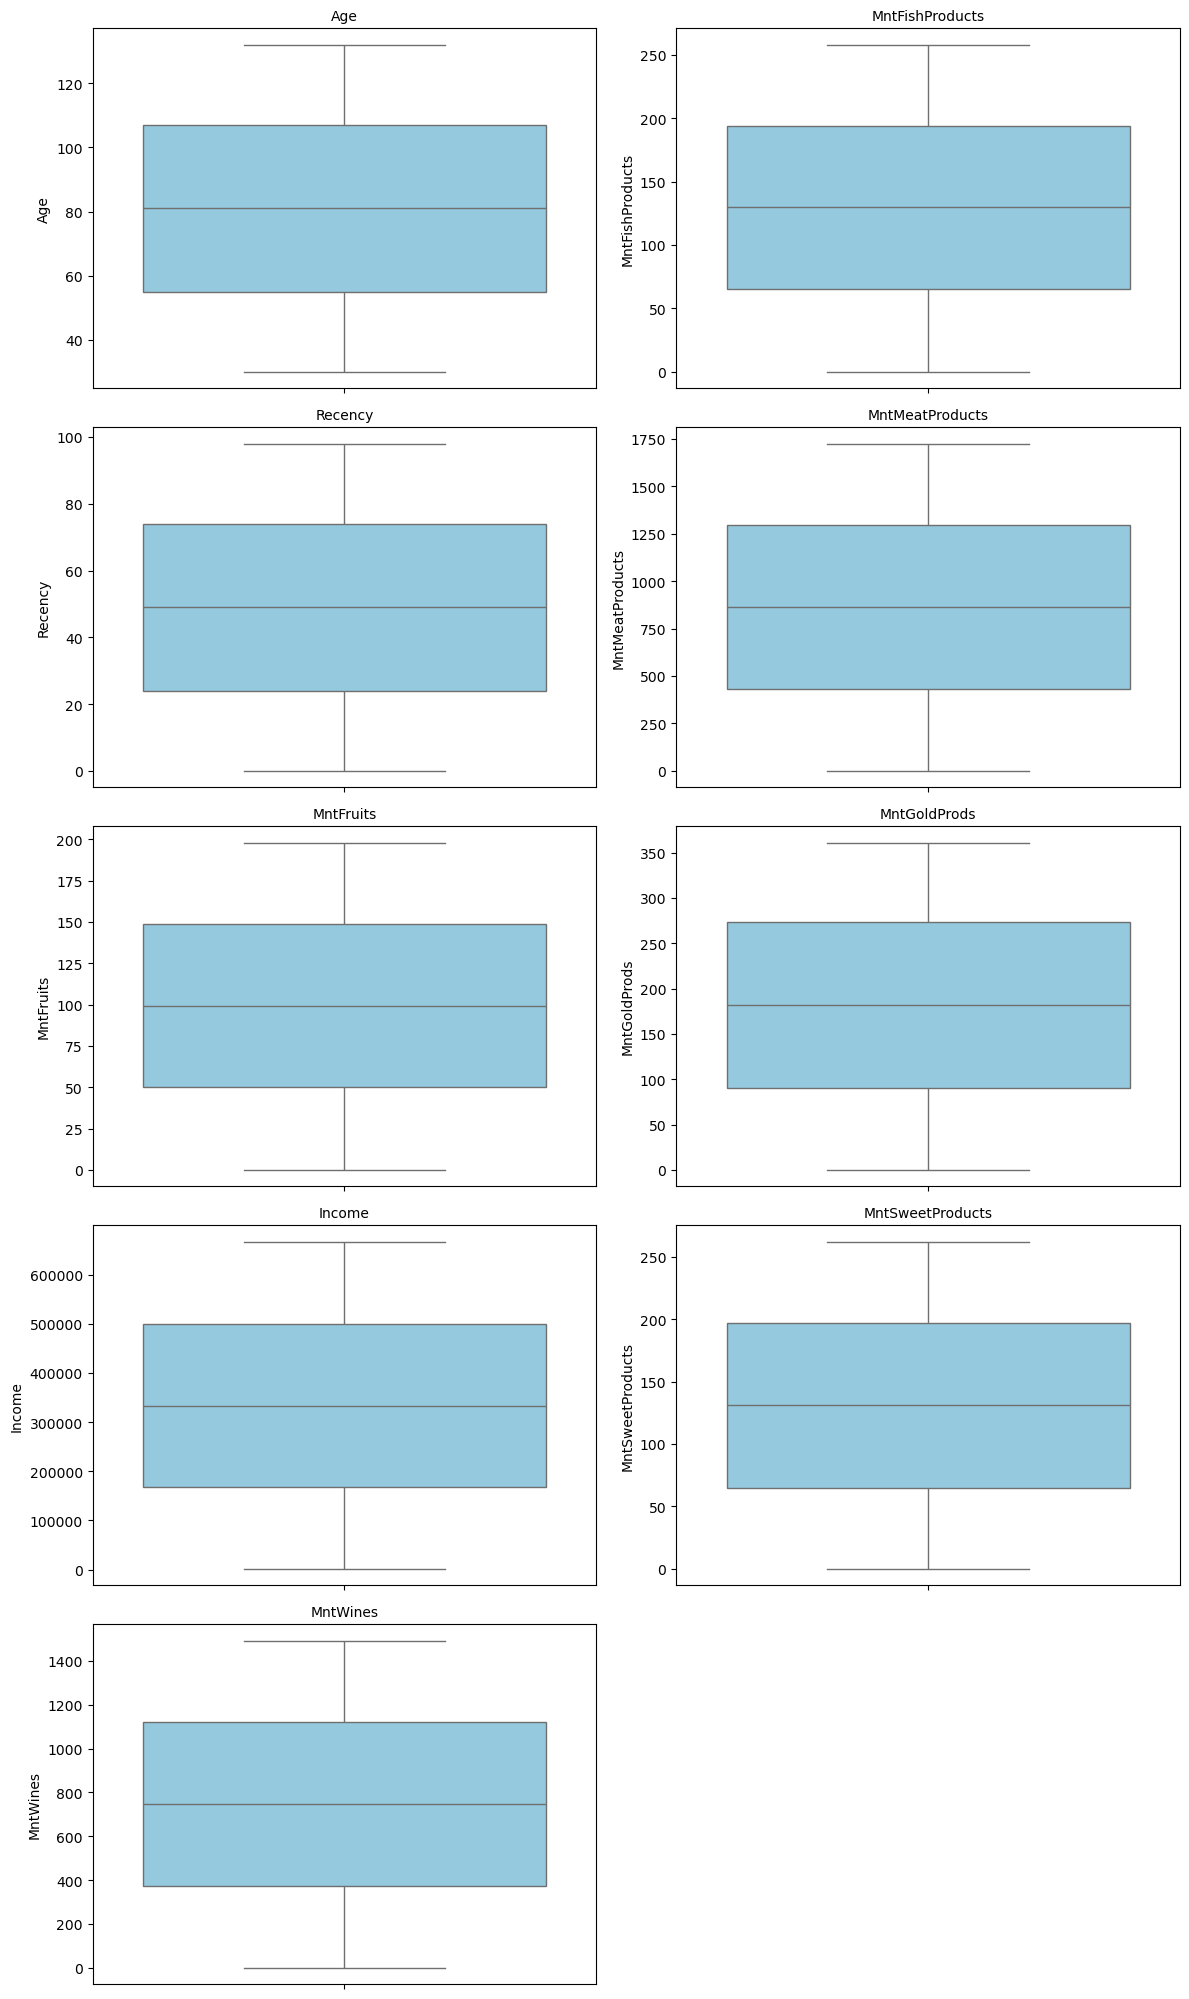

In [33]:
rows = (len(cols) + 1) // 2
plt.figure(figsize=(12, rows * 4))
for i, col in enumerate(check_cols, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
plt.tight_layout()
plt.show()

### Observations:
- From the above graph we have no signs of outliers.That does not mean that there are none of em
- We now proceed to the next stage of outlier detection(a different mode).
- The mode is Histplot with kde distribution curves
- Any sudden change in the kde curve signifies the presence of the outliers
- Flatness of the curve determines the absence of the outliers

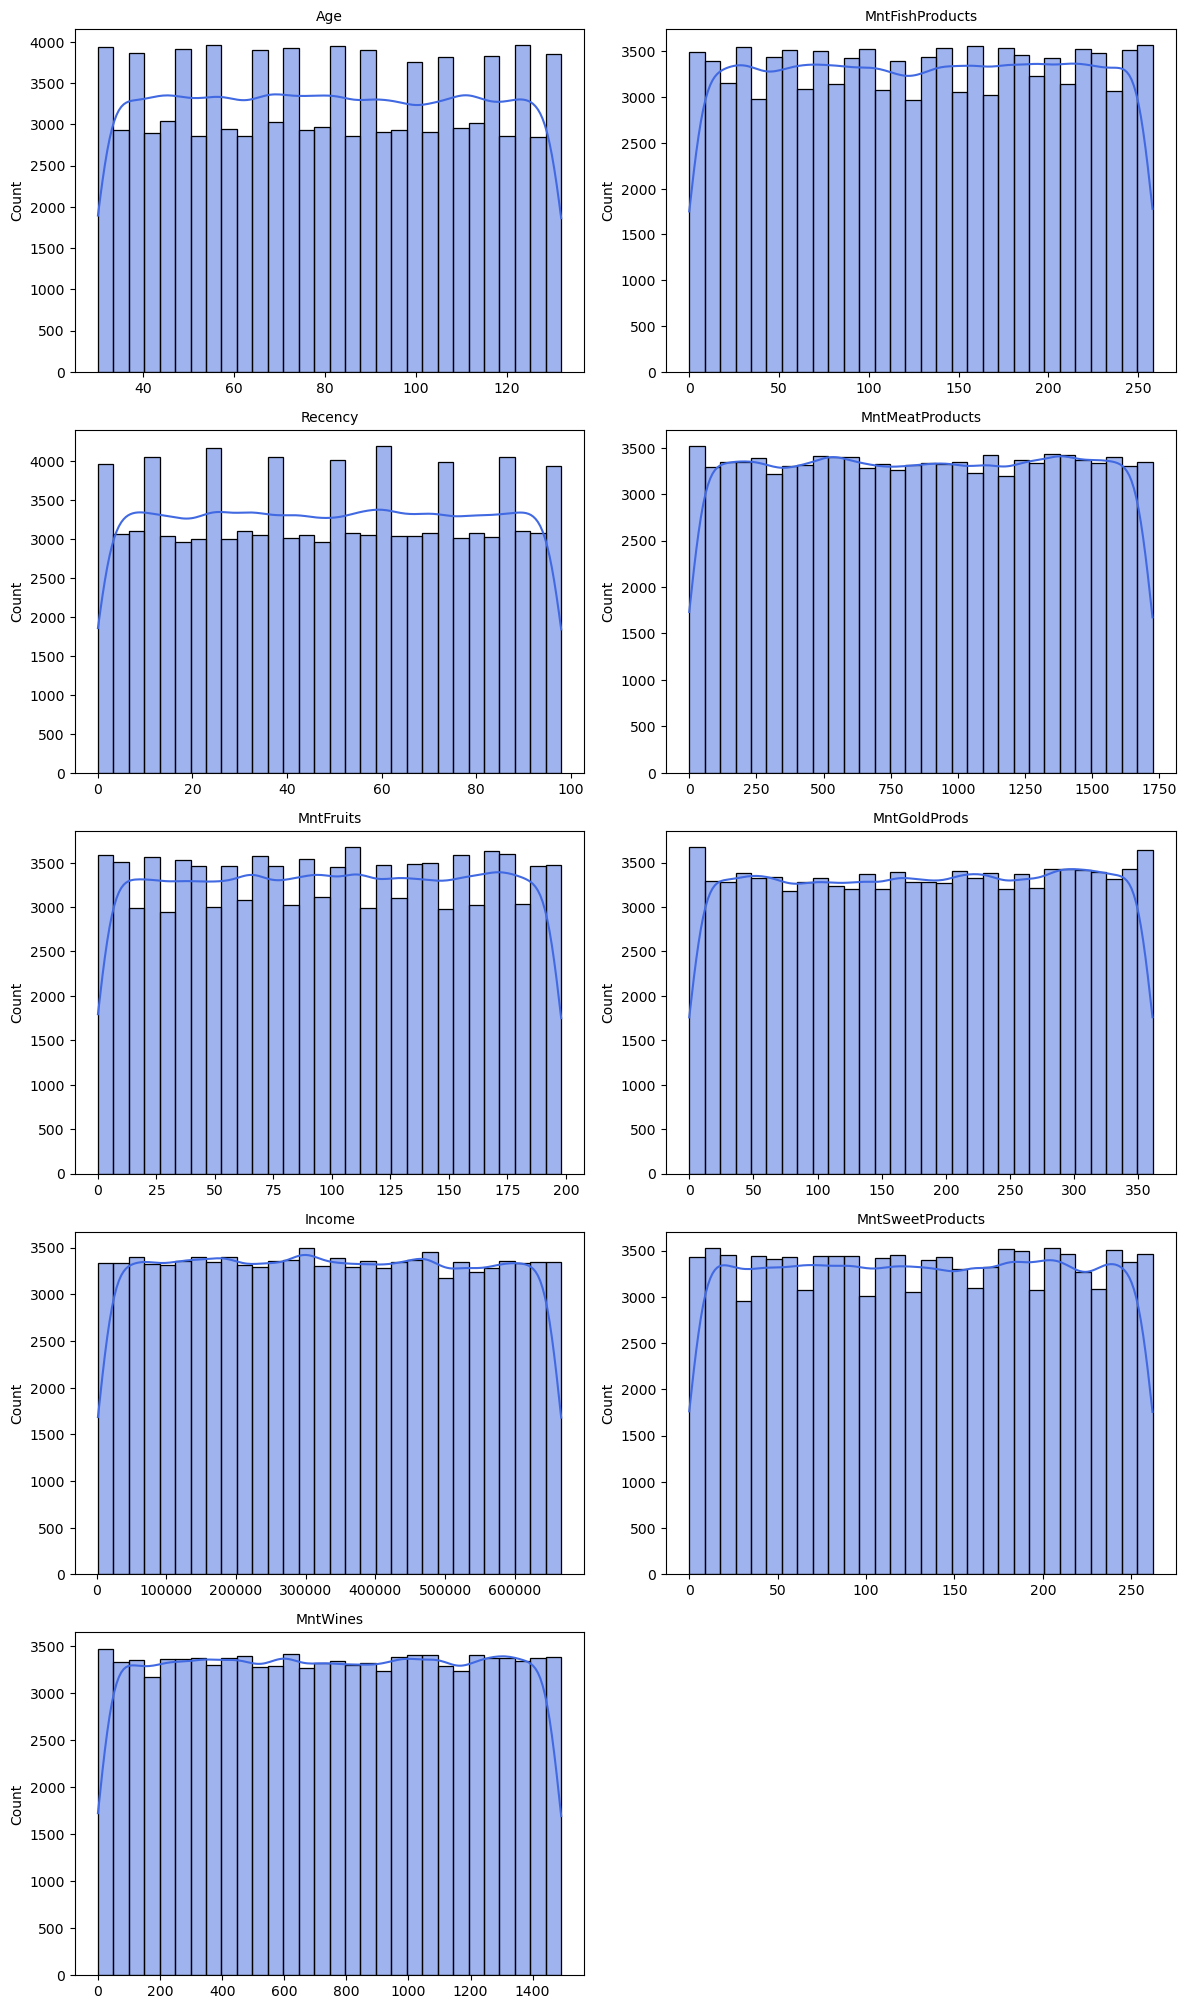

In [35]:
rows = (len(cols) +1)//2
plt.figure(figsize =(12,4 * rows))
for i , col in enumerate(check_cols ,1):
    plt.subplot(rows,2,i)
    sns.histplot(data[col],kde =True,color = 'royalblue',bins = 30)
    plt.title(col, fontsize=10)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

### Observations
- Histplot shows no signs of the outliers
- Now then proceeding into the final stage DBSCAN outlier detection
- The cols will be subjected with the DBSCAN algorithm and anything that is -1 is an outlier
- Then standardization of data in the below cell

In [37]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled , columns = data.columns)
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100279 non-null  float64
 1   Education                100279 non-null  float64
 2   Income                   100279 non-null  float64
 3   Recency                  100279 non-null  float64
 4   MntWines                 100279 non-null  float64
 5   MntFruits                100279 non-null  float64
 6   MntMeatProducts          100279 non-null  float64
 7   MntFishProducts          100279 non-null  float64
 8   MntSweetProducts         100279 non-null  float64
 9   MntGoldProds             100279 non-null  float64
 10  NumDealsPurchases        100279 non-null  float64
 11  NumWebPurchases          100279 non-null  float64
 12  NumCatalogPurchases      100279 non-null  float64
 13  NumStorePurchases        100279 non-null  float64
 14  NumW

### Observations
- Now an effort to find the epsilon and min_samples
- The ideal value for min_sample is twice the no of features.Since total no of features are close to 27 then double it we get 54. Then somewhere around 45 should be fine
- Then now the part for the epsilon we need to plot an eblow graph and then find a point of sudden elevation and consider it as our epsilon value
- Here we need to check whether the curve is stable and consistent or not.So we find out the curve for 5-10 nearest neighbor point(5,6,7,8,9,10). It is ideal to use less value for the nearest neighbor is because lower the number higher then density

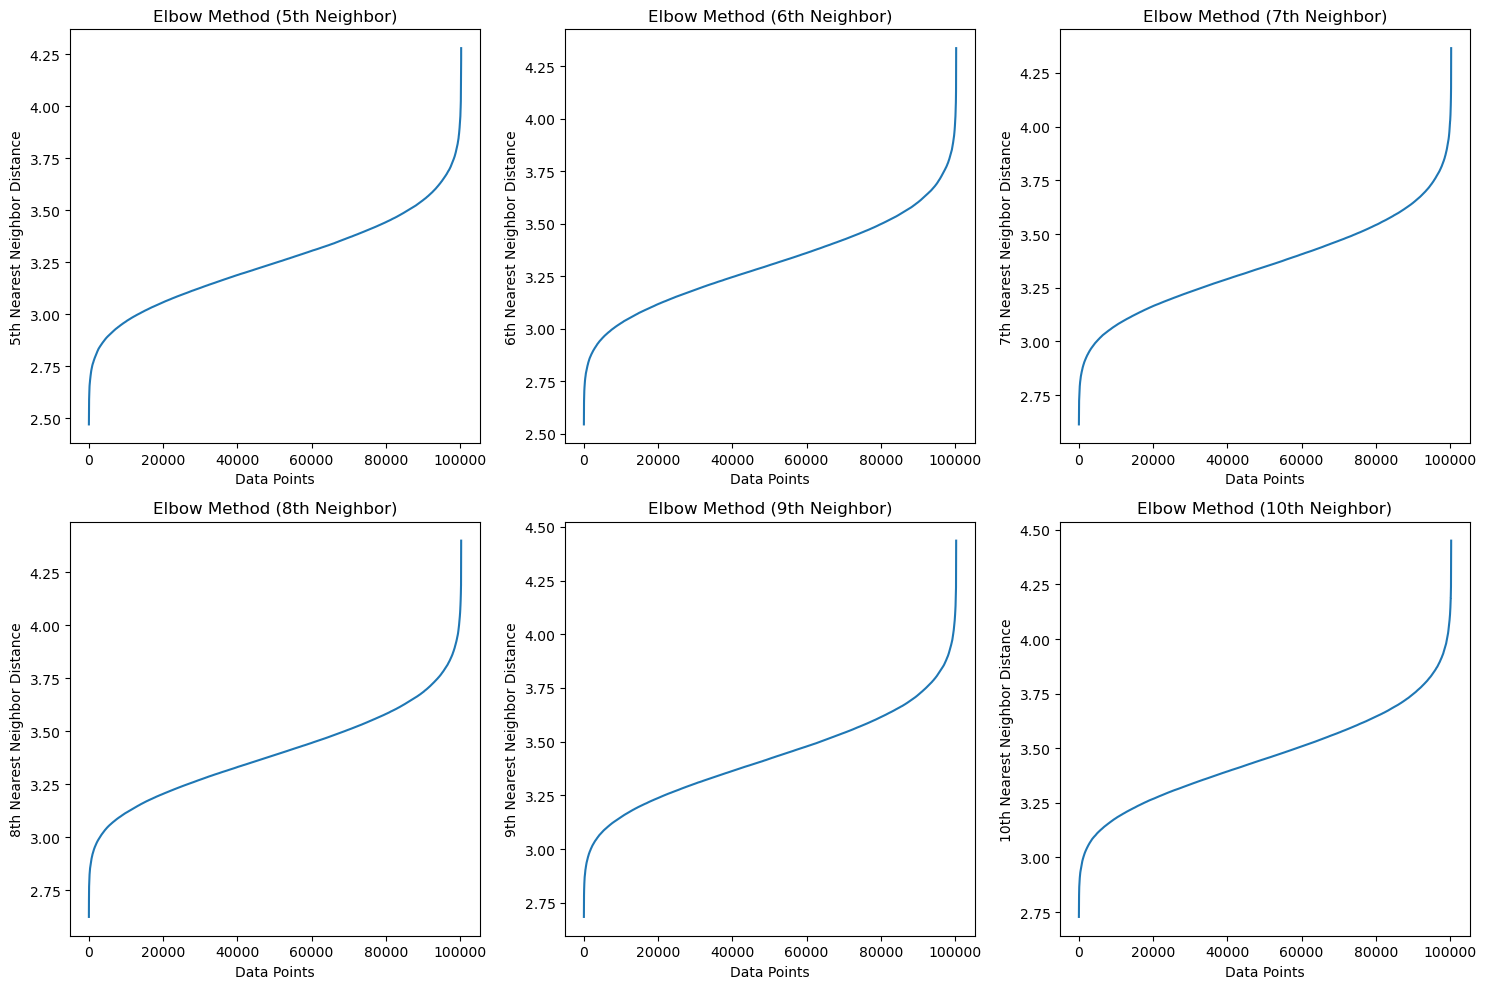

In [39]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=54)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)
test = [5, 6, 7, 8, 9, 10]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for idx, i in enumerate(test):
    row, col = divmod(idx, 3)
    sorted_distances = np.sort(distances[:, i-1], axis=0)
    axes[row, col].plot(sorted_distances)
    axes[row, col].set_xlabel("Data Points")
    axes[row, col].set_ylabel(f"{i}th Nearest Neighbor Distance")
    axes[row, col].set_title(f"Elbow Method ({i}th Neighbor)")

plt.tight_layout()
plt.show()


### Observations
- From the above graphs the curve is found to stable so we could consider the elbow point from the given graphs.
- The elbow point is found to be somewhere near 3.75-4.10 so we chose 4 for the model
- And then upon checking multiple values 4 is considered as good
- Then creating the DBSCAN model, fitting the model with the scaled data. The adding a new col called outliers for indentifying the no of of outliers
- Then pruning them for better results and moving forward

In [41]:
dbscan = DBSCAN(eps = 3.535 , min_samples = 45)
labels = dbscan.fit_predict(data_scaled)
data['Outliers'] = labels

In [42]:
data['Outliers'].unique()

array([ 1,  2, -1,  0], dtype=int64)

In [43]:
data['Outliers'].value_counts()

Outliers
 1    54105
-1    28318
 0     9231
 2     8625
Name: count, dtype: int64

In [44]:
data = data.loc[data['Outliers'] != -1]

In [45]:
data['Outliers'].value_counts()

Outliers
1    54105
0     9231
2     8625
Name: count, dtype: int64

In [46]:
data.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty,Outliers
0,1,3,491796.22,31,1364,72,1129,45,69,206,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,12,1
1,2,3,513926.78,23,1275,94,455,217,104,61,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51,11,2
3,4,4,231628.91,13,251,87,1153,157,241,197,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,12,0
4,5,0,223936.10,65,670,10,650,34,96,321,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94,12,1
7,8,1,491725.72,25,91,155,1131,248,262,141,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120,12,1


In [47]:
data.drop('Outliers',axis = 1,inplace = True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71961 entries, 0 to 100278
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       71961 non-null  int64  
 1   Education                71961 non-null  int32  
 2   Income                   71961 non-null  float64
 3   Recency                  71961 non-null  int64  
 4   MntWines                 71961 non-null  int64  
 5   MntFruits                71961 non-null  int64  
 6   MntMeatProducts          71961 non-null  int64  
 7   MntFishProducts          71961 non-null  int64  
 8   MntSweetProducts         71961 non-null  int64  
 9   MntGoldProds             71961 non-null  int64  
 10  NumDealsPurchases        71961 non-null  int64  
 11  NumWebPurchases          71961 non-null  int64  
 12  NumCatalogPurchases      71961 non-null  int64  
 13  NumStorePurchases        71961 non-null  int64  
 14  NumWebVisitsMonth        7

In [88]:
data.reset_index(drop = True,inplace = True)

In [90]:
data.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty
0,1,3,491796.22,31,1364,72,1129,45,69,206,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,12
1,2,3,513926.78,23,1275,94,455,217,104,61,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51,11
2,4,4,231628.91,13,251,87,1153,157,241,197,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,12
3,5,0,223936.10,65,670,10,650,34,96,321,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94,12
4,8,1,491725.72,25,91,155,1131,248,262,141,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120,12


In [92]:
data.drop('ID',axis = 1,inplace = True)

In [94]:
data.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Children,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age,Loyalty
0,3,491796.22,31,1364,72,1129,45,69,206,0,...,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47,12
1,3,513926.78,23,1275,94,455,217,104,61,0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,51,11
2,4,231628.91,13,251,87,1153,157,241,197,4,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,114,12
3,0,223936.10,65,670,10,650,34,96,321,6,...,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,94,12
4,1,491725.72,25,91,155,1131,248,262,141,6,...,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120,12


In [98]:
num_cols = check_cols.copy()

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71961 entries, 0 to 71960
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                71961 non-null  int32  
 1   Income                   71961 non-null  float64
 2   Recency                  71961 non-null  int64  
 3   MntWines                 71961 non-null  int64  
 4   MntFruits                71961 non-null  int64  
 5   MntMeatProducts          71961 non-null  int64  
 6   MntFishProducts          71961 non-null  int64  
 7   MntSweetProducts         71961 non-null  int64  
 8   MntGoldProds             71961 non-null  int64  
 9   NumDealsPurchases        71961 non-null  int64  
 10  NumWebPurchases          71961 non-null  int64  
 11  NumCatalogPurchases      71961 non-null  int64  
 12  NumStorePurchases        71961 non-null  int64  
 13  NumWebVisitsMonth        71961 non-null  int64  
 14  Complain              